###### Práctica_Final_Machine_Learning

Autores:
    - Ricardo Ocaña
    - Jorge Casan Vázquez

## Objetivos KPI´s

Nuestros KPI´s (Key Performance Indicator) son los siguientes:

- Realizar una comparación entre la probabilidad de ganar un partido de tenis diferenciando si es Grand-Slam o no.
- El mejor tenista para tres tipos de superificie, ya sea tierra batida, pista dura o pista rápida.
- Predecir la evolución que va a tener nuestro compatriota, Rafael Nadal para los siguientes años


## Resumen ejecutivo

El objetivo de este análisis es realizar un análisis comparativo según el cual se muestren las principales diferencias según las victorias entre los GrandSlams y los que no sean, en donde veremos que la probabilidad de ganar el partido es mucho mayor en estos últimos, debido fundamentalmente a la complejidad de entrar en los primeros y en el alto nivel de exigencia que existe con los tenistas que entran. 

En segundo lugar, analizaremos la probabilidad de ganar un Grand-Slam diferenciando por los sets disputados, en donde veremos que el último set resulta ser el decisorio, esto es debido fundamentalmente al cansancio presente por todo el partido, existiendo una alta correlación entre la probabilidad de victoria del partido con ganar el último set. 

Sin embargo, para aquellos partidos que sean Grand-Slam la probabilidad de ganar el partido está relacionado con ganar el primer y el segundo set del partido. 

Seguidamente representaremos un gráfico tridimensional con las diferentes superficies (tierra batida y en césped) y la relación que guardan con los buenos tenistas, en donde veremos que existe una mayor proporción de buenos tenistas en las tierras que no son de tierra batida. 

Realizaremos una comparación entre los TOP 3 tenistas hasta el momento, Federer, Nadal y Djokovic diferenciando la probabilidad de ganar entre diferentes superificies y veremos que el mejor en tierra batida es Rafael Nadal, con una probabilidad de éxito bastante diferenciada, siendo el peor Federer. 

Por otra parte, pista rápida y dura Roger Federer es el mejor en las dos, estando Novak Djokovic en la posición intermedia para los tres tipos de superficie y Rafael Nadal el que tiene menos probabilidad de ganar el partido en estas dos últimas.

## Importación de las librerías

- La librería numpy nos sirve para realizar cálculos algebraicos
- La librería pandas resulta imprescindible para cargar nuestro fichero
- La librería matplotlib resulta esencial para presentar gráficamente nuestros datos
- La librería seaborn se utiliza normalmente para la representación de los histogramas

In [126]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib
matplotlib.style.use('fivethirtyeight')
import os
import seaborn as sns 
from subprocess import check_output
import itertools

## Cargamos nuestro data set

Nos cargamos nuestro data set

In [127]:
tennis_df = pd.read_csv('C:/Users/ricki/OneDrive/Desktop/Machinepractica/Data.csv', encoding='latin1') 

C:\Users\ricki\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning:

Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.



## Análisis exploratorio

En primer lugar, vamos a seleccionar un head de las dos primeras observaciones para tener una idea general

In [128]:
tennis_df.head(2)

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
0,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Dosedel S.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Enqvist T.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Realizamos la misma operación con el tail y también observamos que existen muchos valores perdidos

In [129]:
tennis_df.tail(2)

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
46650,54,St. Petersburg,St. Petersburg Open,24/09/2016,ATP250,Indoor,Hard,Semifinals,3,Wawrinka S.,...,NaN,NaN,1.33,3.40,NaN,NaN,1.41,3.80,1.31,3.40
46651,54,St. Petersburg,St. Petersburg Open,25/09/2016,ATP250,Indoor,Hard,The Final,3,Zverev A.,...,NaN,NaN,3.30,1.33,NaN,NaN,3.58,1.36,3.36,1.31


A través del comando info podemos ver cuáles son nuestras variables, de las cuales las que más nos interesan son las siguientes:

- ATP
- Localización
- Torneo
- Fecha de celebración
- Series
- Pista
- Superficie
- Ganador
- Sub-campeon
- Perdedor
- Sets ganados
- Sets perdidos

In [130]:
tennis_df.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'W1', 'L1',
       'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets', 'Lsets',
       'Comment', 'CBW', 'CBL', 'GBW', 'GBL', 'IWW', 'IWL', 'SBW', 'SBL',
       'B365W', 'B365L', 'B&WW', 'B&WL', 'EXW', 'EXL', 'PSW', 'PSL', 'WPts',
       'LPts', 'UBW', 'UBL', 'LBW', 'LBL', 'SJW', 'SJL', 'MaxW', 'MaxL',
       'AvgW', 'AvgL'],
      dtype='object')

In [131]:
tennis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46652 entries, 0 to 46651
Data columns (total 54 columns):
ATP           46652 non-null int64
Location      46652 non-null object
Tournament    46652 non-null object
Date          46652 non-null object
Series        46652 non-null object
Court         46652 non-null object
Surface       46652 non-null object
Round         46652 non-null object
Best of       46652 non-null int64
Winner        46652 non-null object
Loser         46652 non-null object
WRank         46637 non-null object
LRank         46581 non-null object
W1            46423 non-null float64
L1            46423 non-null float64
W2            45962 non-null float64
L2            45963 non-null float64
W3            21365 non-null float64
L3            21365 non-null float64
W4            4226 non-null float64
L4            4226 non-null float64
W5            1617 non-null float64
L5            1617 non-null float64
Wsets         46462 non-null float64
Lsets         46462 no

Tenemos 46.652 observaciones

In [132]:
len(tennis_df)

46652

Nos gusta tener una muestra de los datos aleatorios para ver como están distribuidos y tener idea más generalizada

In [133]:
tennis_df.sample(10)

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
648,18,Scottsdale,Franklin Templeton Tennis Classic,6/03/2000,International,Outdoor,Hard,1st Round,3,Lapentti N.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46097,41,Hamburg,German Tennis Championships,14/07/2016,ATP500,Outdoor,Clay,2nd Round,3,Gimeno-Traver D.,...,NaN,NaN,1.91,1.91,NaN,NaN,2.05,1.91,1.95,1.83
22075,39,Newport,Hall of Fame Championships,13/07/2007,International,Outdoor,Grass,Quarterfinals,3,Mahut N.,...,1.12,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20558,6,Melbourne,Australian Open,17/01/2007,Grand Slam,Outdoor,Hard,2nd Round,5,Arthurs W.,...,2.00,1.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43214,37,Queens Club,AEGON Championships,15/06/2015,ATP500,Outdoor,Grass,1st Round,3,Gasquet R.,...,NaN,NaN,1.36,3.00,NaN,NaN,1.41,3.45,1.34,3.14
29546,24,Barcelona,Open Banco Sabadell,20/04/2010,ATP500,Outdoor,Clay,2nd Round,3,Almagro N.,...,NaN,NaN,1.14,5.00,1.14,5.0,1.18,6.60,1.13,5.42
21584,30,Portschach,Hypo Group Tennis International,25/05/2007,International,Outdoor,Clay,Semifinals,3,Monaco J.,...,1.50,2.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15824,31,Paris,French Open,24/05/2005,Grand Slam,Outdoor,Clay,1st Round,5,Hernych J.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14577,2,Chennai,TATA Open,8/01/2005,International,Outdoor,Hard,Semifinals,3,Srichaphan P.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22807,57,Tokyo,AIG Japan Open Tennis Championships,2/10/2007,International Gold,Outdoor,Hard,1st Round,3,Gimelstob J.,...,3.00,1.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observamos que tenemos muchos missing values para variables que no nos son cruciales a la hora de analizar el rendimiento de los TOP3 jugadores, jugando en las diferentes superficies de pista

In [134]:
tennis_df.isna().sum()

ATP               0
Location          0
Tournament        0
Date              0
Series            0
Court             0
Surface           0
Round             0
Best of           0
Winner            0
Loser             0
WRank            15
LRank            71
W1              229
L1              229
W2              690
L2              689
W3            25287
L3            25287
W4            42426
L4            42426
W5            45035
L5            45035
Wsets           190
Lsets           190
Comment           0
CBW           29145
CBL           29145
GBW           41597
GBL           41597
IWW           33294
IWL           33294
SBW           41228
SBL           41228
B365W          8633
B365L          8610
B&WW          45555
B&WL          45555
EXW           12853
EXL           12848
PSW           14923
PSL           14923
WPts          16204
LPts          16256
UBW           35980
UBL           35980
LBW           23422
LBL           23413
SJW           31080
SJL           31073


También podemos ver cómo son el tipo de las variables, para la mayoría de las variables cuantituativas el tipo es float

In [135]:
tennis_df.dtypes

ATP             int64
Location       object
Tournament     object
Date           object
Series         object
Court          object
Surface        object
Round          object
Best of         int64
Winner         object
Loser          object
WRank          object
LRank          object
W1            float64
L1            float64
W2            float64
L2            float64
W3            float64
L3            float64
W4            float64
L4            float64
W5            float64
L5            float64
Wsets         float64
Lsets         float64
Comment        object
CBW           float64
CBL           float64
GBW           float64
GBL           float64
IWW           float64
IWL           float64
SBW           float64
SBL           float64
B365W         float64
B365L         float64
B&WW          float64
B&WL          float64
EXW           float64
EXL           float64
PSW           float64
PSL           float64
WPts          float64
LPts          float64
UBW           float64
UBL       

Realizando un summary sobre nuestros datos, nos hacemos una idea del máximo, mínimo, desviación títica,  media y rangos intercuartílicos

In [136]:
tennis_df.describe()

,ATP,Best of,W1,L1,W2,L2,W3,L3,W4,L4,...,UBW,UBL,LBW,LBL,SJW,SJL,MaxW,MaxL,AvgW,AvgL
count,46652.000000,46652.000000,46423.000000,46423.000000,45962.000000,45963.000000,21365.000000,21365.000000,4226.000000,4226.000000,...,10672.000000,10672.000000,23230.000000,23239.000000,15572.000000,15579.000000,17104.000000,17104.000000,17104.000000,17104.000000
mean,32.931000,3.373746,5.792667,4.043211,5.772856,3.853621,6.018254,3.592745,5.777094,3.871510,...,1.815797,3.542452,1.795751,3.510855,1.795808,3.558671,1.991862,9.824993,1.820060,3.706502
std,17.953268,0.780315,1.239261,1.847833,1.253846,1.878397,0.936149,1.767542,1.264913,1.891446,...,0.996191,3.646138,1.023604,3.175995,1.003732,3.272284,1.684590,458.068834,1.117214,3.455871
min,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.010000,1.020000,1.000000,1.000000,1.000000,1.010000,1.010000,1.010000,1.010000,1.010000
25%,19.000000,3.000000,6.000000,3.000000,6.000000,2.000000,6.000000,2.000000,6.000000,2.000000,...,1.240000,1.750000,1.222000,1.730000,1.220000,1.730000,1.270000,1.860000,1.220000,1.750000
50%,33.000000,3.000000,6.000000,4.000000,6.000000,4.000000,6.000000,4.000000,6.000000,4.000000,...,1.500000,2.500000,1.500000,2.620000,1.500000,2.630000,1.560000,2.850000,1.480000,2.600000
75%,49.000000,3.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,6.000000,6.000000,...,2.030000,3.850000,2.000000,4.000000,2.000000,4.000000,2.200000,4.740000,2.030000,4.090000
max,69.000000,5.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,18.000000,60.000000,26.000000,51.000000,19.000000,81.000000,76.000000,42586.000000,23.450000,36.440000


### Matriz de correlación

Vamos a representar diferentes formas de matrices de correlación para ver si existen variables que estén fuertemente relacionadas las unas con las otras y determinar si pueden existir probemas de multicolinealidad

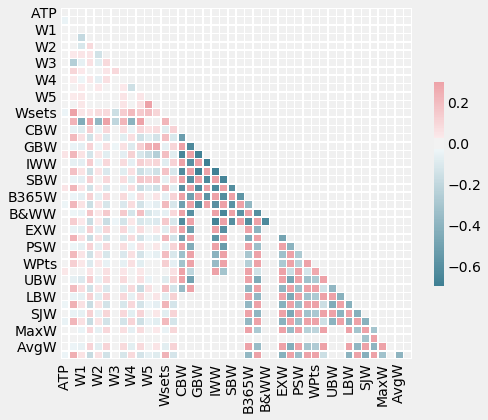

In [137]:
corr = tennis_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(7, 7))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Otra forma de representar la matriz de correlación, y de manera más precisa y detallada

In [138]:
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

C:\Users\ricki\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning:

invalid value encountered in less



Sobre la matriz de correlación, obtenemos los siguientes resultados:

 1. No existe una alta correlación sobre nuestras variables seleccionadas
 
 2. Sobre la mayor parte de las variables que contienen valores perdidos existe una correlación mayor, con lo cual podremos eliminar estas variables para nuestro análisis, puesto que no aportan información relevante para nuestros KPI´s.

In [139]:
tennis_df.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'W1', 'L1',
       'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets', 'Lsets',
       'Comment', 'CBW', 'CBL', 'GBW', 'GBL', 'IWW', 'IWL', 'SBW', 'SBL',
       'B365W', 'B365L', 'B&WW', 'B&WL', 'EXW', 'EXL', 'PSW', 'PSL', 'WPts',
       'LPts', 'UBW', 'UBL', 'LBW', 'LBL', 'SJW', 'SJL', 'MaxW', 'MaxL',
       'AvgW', 'AvgL'],
      dtype='object')

In [140]:
datos_limpios= tennis_df[['ATP', 'Location', 'Tournament', 'Date',
                                                   'Series', 'Court', 'Surface', 'Round', 'Best of',
                                                   'Winner','Loser', 'WRank','LRank', 'W1', 'L1',
                                                  'W2','L2', 'Wsets', 'Lsets']]
datos_limpios



,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,W1,L1,W2,L2,Wsets,Lsets
0,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Dosedel S.,Ljubicic I.,63,77,6.0,4.0,6.0,2.0,2.0,0.0
1,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Enqvist T.,Clement A.,5,56,6.0,3.0,6.0,3.0,2.0,0.0
2,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Escude N.,Baccanello P.,40,655,6.0,7.0,7.0,5.0,2.0,1.0
3,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Federer R.,Knippschild J.,65,87,6.0,1.0,6.0,4.0,2.0,0.0
4,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Fromberg R.,Woodbridge T.,81,198,7.0,6.0,5.0,7.0,2.0,1.0
5,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Gambill J.M.,Arthurs W.,58,105,3.0,6.0,7.0,6.0,2.0,1.0
6,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Grosjean S.,Ilie A.,26,51,6.0,2.0,6.0,1.0,2.0,0.0
7,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Henman T.,Balcells J.,11,218,6.0,4.0,7.0,6.0,2.0,0.0
8,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Hewitt L.,Woodforde M.,24,129,6.0,3.0,2.0,6.0,2.0,1.0
9,1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Lisnard J.,Tebbutt M.,134,351,7.0,6.0,6.0,7.0,2.0,1.0


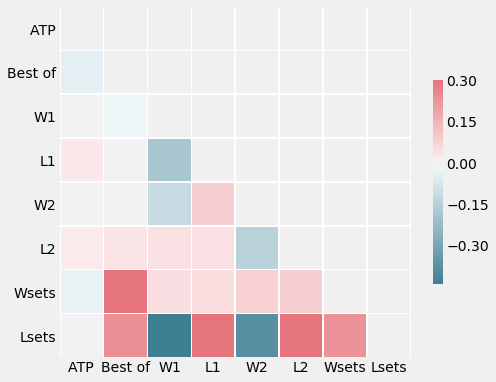

In [141]:
corr = datos_limpios.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(7, 7))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Con las variables que hemos filtrado, tenemos una matriz de correlación mucho más clara, en donde podemos sacar las siguientes conclusiones:  
- Existe una alta correlación entre el jugador que haya ganado más sets y el ganador de partidos, lo cual tiene todo el sentido. A mayor porcentaje de sets ganados mayor es la probabilidad de ganar el partido.
- Al igual que en el punto 1 pero a la inversa, existe una clara relación entre el jugador que haya perdido más sets y el perdedor de los partidos, por la misma razón y razonamiento contrario que el anterior.
    

### Análisis de outliers

In [142]:
from sklearn.preprocessing import StandardScaler

Vamos a realizar a continuación el análisis de los outliers

In [143]:
datos_limpios.columns

Index(['ATP', 'Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface',
       'Round', 'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'W1', 'L1',
       'W2', 'L2', 'Wsets', 'Lsets'],
      dtype='object')

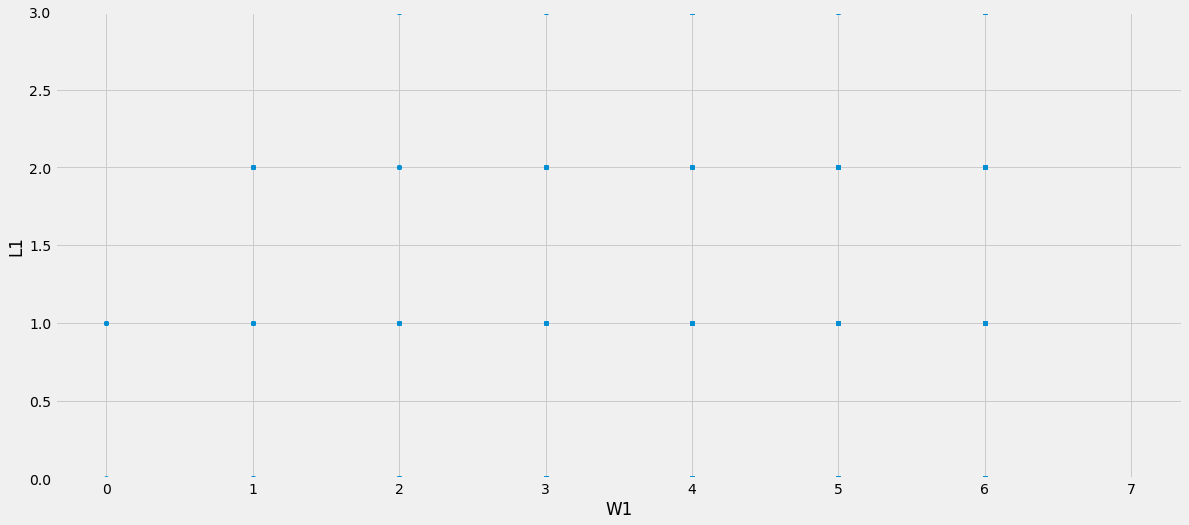

In [144]:
var = 'W1'
data = pd.concat([datos_limpios['L1'], datos_limpios[var]], axis=1)
data.plot.scatter(x=var, y='L1', ylim=(0,3))

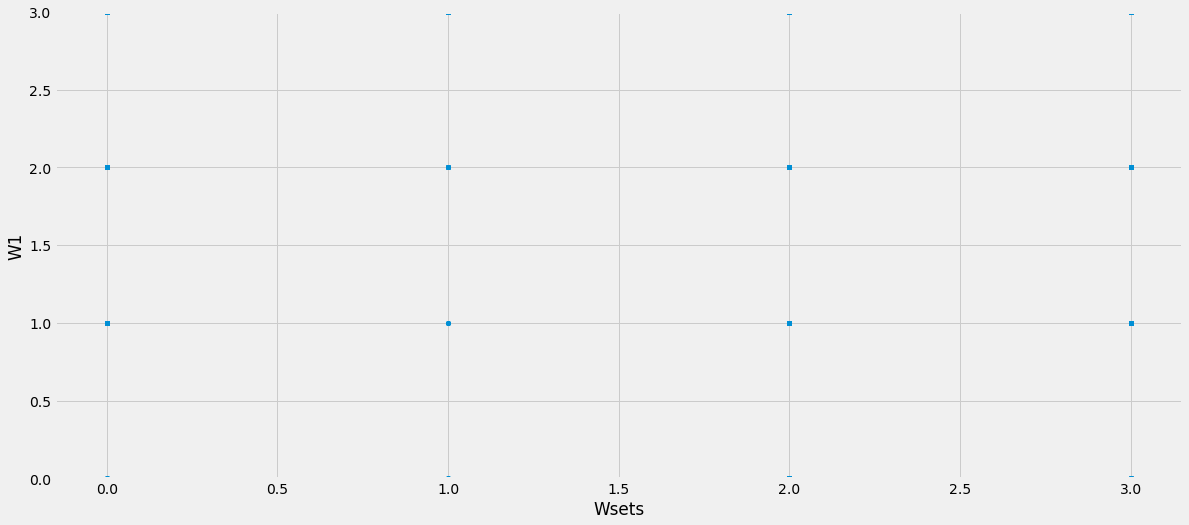

In [145]:
var = 'Wsets'
data = pd.concat([datos_limpios['W1'], datos_limpios[var]], axis=1)
data.plot.scatter(x=var, y='W1', ylim=(0,3))

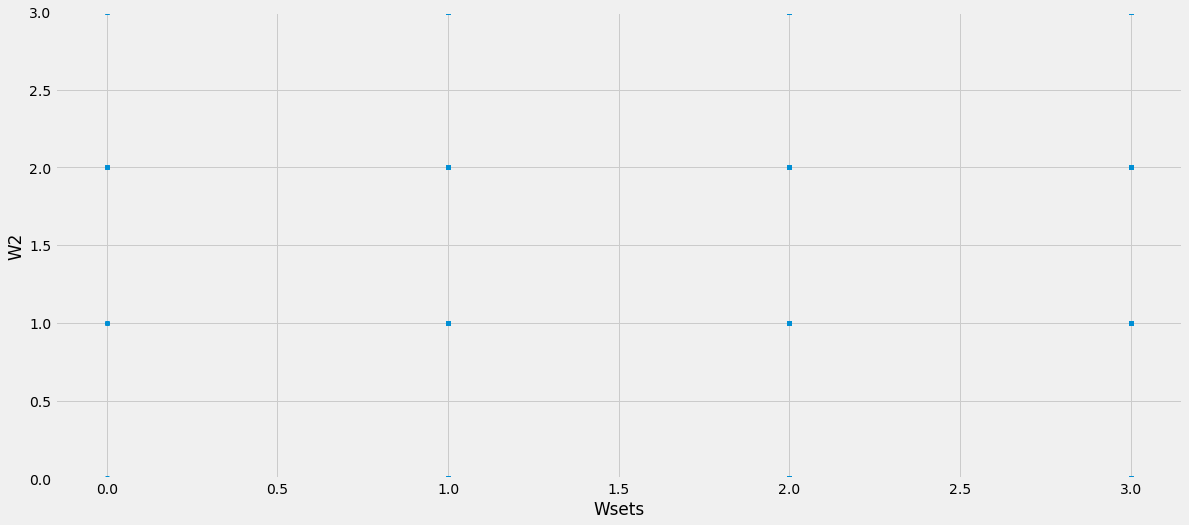

In [146]:
var = 'Wsets'
data = pd.concat([datos_limpios['W2'], datos_limpios[var]], axis=1)
data.plot.scatter(x=var, y='W2', ylim=(0,3))

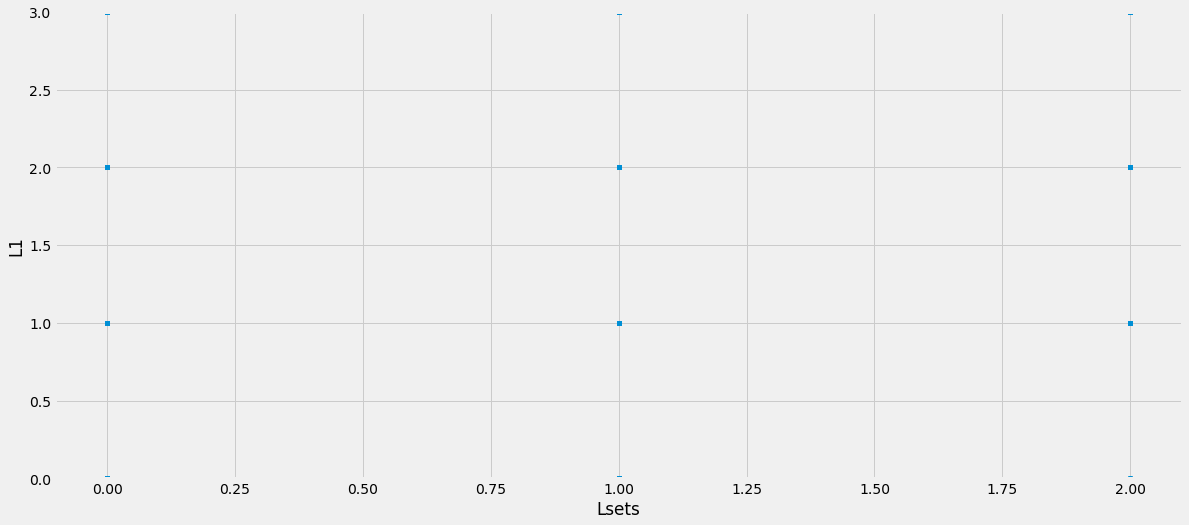

In [147]:
var = 'Lsets'
data = pd.concat([datos_limpios['L1'], datos_limpios[var]], axis=1)
data.plot.scatter(x=var, y='L1', ylim=(0,3))

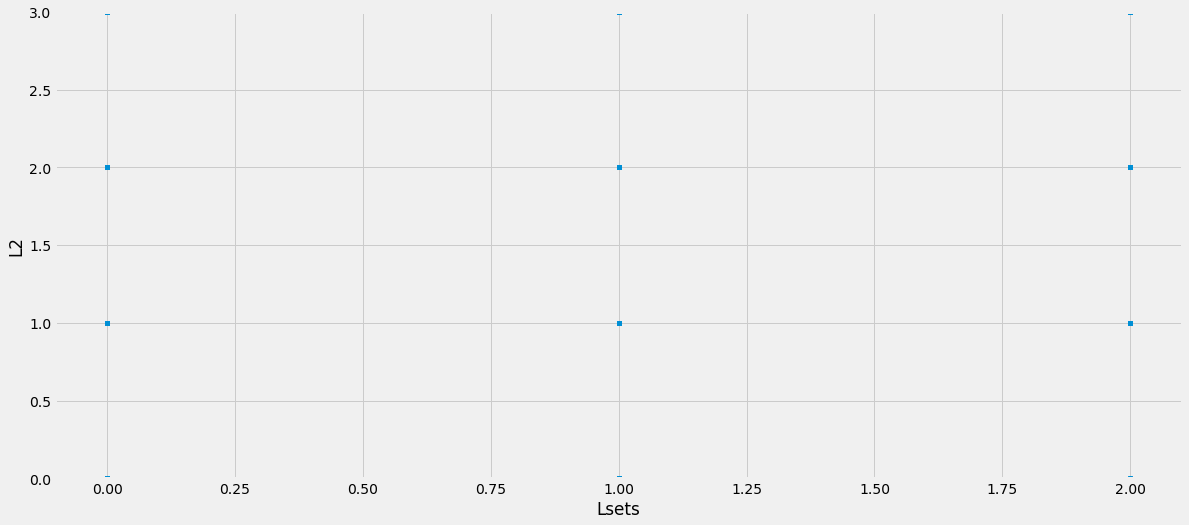

In [148]:
var = 'Lsets'
data = pd.concat([datos_limpios['L2'], datos_limpios[var]], axis=1)
data.plot.scatter(x=var, y='L2', ylim=(0,3))

Sobre nuestro análisis de los outliers, obtenemos las siguientes conclusiones:

- Hemos comparado si existen outliers entre los sets ganados y perdidos y entre los jugadores que han sido el campeón y subcampeón de los torneos y los dos peores del campeonato
- A simple vista no existen outliers que hagan que nuestro análisis no sea representativo

## Análisis entre los Grand-Slams y no Grand-Slams

Vamos a representar gráficamente, a través de un diagrama de barras, aquellos campeonatos que hayan sido Grand-Slam y aquellos que no hayan sido, para ver la proporción entre ellos así como su importancia

Los pasos que hemos seguido para representarlo han sido los siguientes:
    
- En primer lugar, tanto el Winner Rank como el Loser Rank lo hemos convertido a numérico filtrando por aquellos en donde se hayan cometido errores forzados.
- En segundo lugar, hemos calculado la diferencia entre el rango ganador y el rango perdedor.
- En tercer lugar, hemos calculado el número total de sets disputados, para ello hemos sumado los sets ganados y los sets perdidos, con el fin de determinar la proporción entre cada uno de ellos.
- En cuarto lugar, rellenamos los missing values a 0 para poderlo representar gráficamente

In [149]:
tennis_df.WRank = pd.to_numeric(tennis_df.WRank, errors = 'coerce') 
tennis_df.LRank = pd.to_numeric(tennis_df.LRank, errors = 'coerce')
tennis_df['Diff'] =  tennis_df.LRank - tennis_df.WRank 
tennis_df['Round_10'] = 10*round(np.true_divide(tennis_df.Diff,10))
tennis_df['Round_20'] = 20*round(np.true_divide(tennis_df.Diff,20))
tennis_df['Total Sets'] = tennis_df.Wsets + tennis_df.Lsets

tennis_df.W3 = tennis_df.W3.fillna(0)
tennis_df.W4 = tennis_df.W4.fillna(0)
tennis_df.W5 = tennis_df.W5.fillna(0)
tennis_df.L3 = tennis_df.L3.fillna(0)
tennis_df.L4 = tennis_df.L4.fillna(0)
tennis_df.L5 = tennis_df.L5.fillna(0)

tennis_df['Sets Diff'] = tennis_df.W1+tennis_df.W2+tennis_df.W3+tennis_df.W4+tennis_df.W5 - (tennis_df.L1+tennis_df.L2+tennis_df.L3+tennis_df.L4+tennis_df.L5)
new_df = tennis_df

Una vez depurada nuestra nueva variable denominada 'Sets Diff' nos filtramos todos aquellos que hayan sido Grand-Slams y todos aquellos que no

In [150]:

df_non_GS = new_df[~(new_df.Series == 'Grand Slam')]
df_GS = new_df[new_df.Series == 'Grand Slam']

plt.figure(figsize = (10,10))
bins = np.arange(10,200,10)
Gs_prob = []
non_Gs_prob = []

for value in bins:
    pos = value
    neg = -value
    
    pos_wins = len(df_GS[df_GS.Round_10 == pos])
    neg_wins = len(df_GS[df_GS.Round_10 == neg])
    Gs_prob.append(np.true_divide(pos_wins,pos_wins + neg_wins))
    
    pos_wins = len(df_non_GS[df_non_GS.Round_10 == pos])
    neg_wins = len(df_non_GS[df_non_GS.Round_10 == neg])
    non_Gs_prob.append(np.true_divide(pos_wins,pos_wins + neg_wins))

<Figure size 720x720 with 0 Axes>

Graficamos la probabilidad de victoria y la diferencia de Ranking

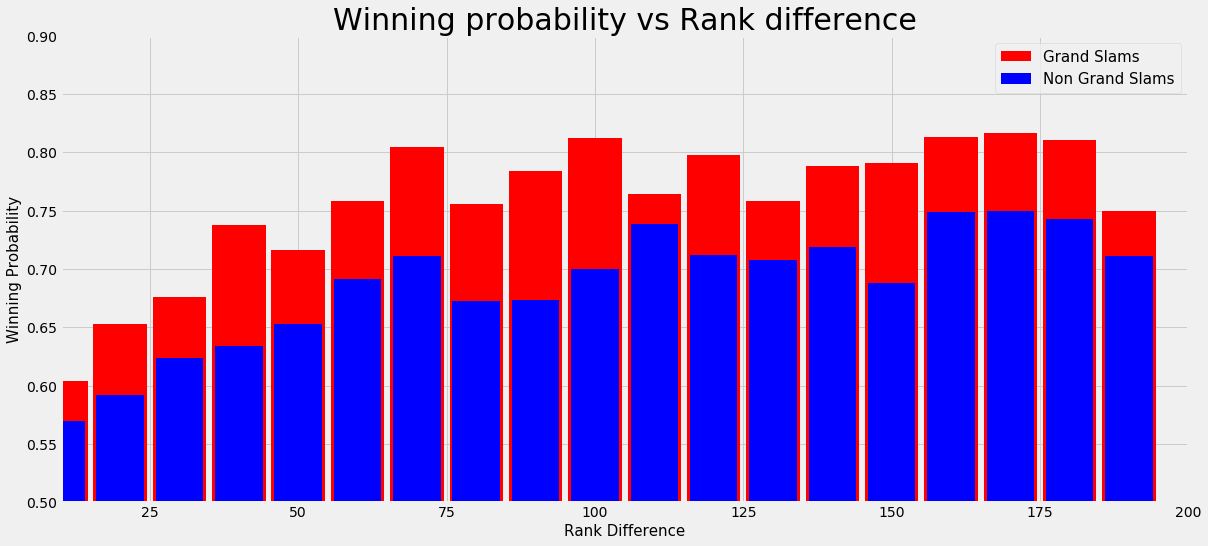

In [151]:
plt.bar(bins,Gs_prob,width = 9, color = 'red') 
plt.bar(bins,non_Gs_prob,width = 8, color = 'blue')
plt.title('Winning probability vs Rank difference', fontsize = 30)
plt.xlabel('Rank Difference',fontsize = 15)
plt.ylabel('Winning Probability',fontsize = 15)
plt.xlim([10,200])
plt.ylim([0.5,0.9])
plt.legend(['Grand Slams', 'Non Grand Slams'], loc = 1, fontsize = 15)
plt.show() 

Del gráfico se pueden extraer las siguientes conclusiones:

- Existe una diferencia significativa entre el número de victorias entre los Grand Slams y los que no han sido. Los primeros han tenido una probabilidad de victoria inferior frente al resto, esto puede haber sido principalmente a la exigencia de alto nivel que existe entre los debutantes y por las barreras de entrada para poder jugar entre estos grandes torneos.

- En segundo lugar, y en relación con la primera, se han celebrado mayor porcentaje de partidos que no han sido Grand Slam frente a los que sí que han sido.


## Análisis de victoria por set

A continuación vamos a realizar un análisis detallado de victorias por set, para ello tendremos que determinar la diferencia por rango y para ello tendremos que crearnos la variable que la llamaremos 'rank_diff_dif_pos.

En segundo lugar, sumaremos todas las victorias de los jugadores en sus respectivos rangos para finalmente comparar victorias por set para los partidos que sean Grand Slam y los que no

In [152]:
plt.figure(figsize = (10,10))
bins = np.arange(10,200,10)

temp_df = df_GS
prob_gs = []

for rank_diff in bins:

    pos = rank_diff
    neg = -rank_diff
    rank_diff_df_pos = temp_df[temp_df.Round_10 == pos]
    w1 = np.sum(rank_diff_df_pos.Wsets)
    l1 = np.sum(rank_diff_df_pos.Lsets)
    
    rank_diff_df_neg = temp_df[temp_df.Round_10 == neg]
    l2 = np.sum(rank_diff_df_neg.Wsets)
    w2 = np.sum(rank_diff_df_pos.Lsets)
    
    w = w1 + w2
    l = l1 + l2
    prob_gs.append(np.true_divide(w, l + w))
    
temp_df = df_non_GS
prob_non_gs = []

for rank_diff in bins:
    
    pos = rank_diff
    neg = -rank_diff
    rank_diff_df_pos = temp_df[temp_df.Round_10 == pos]
    w1 = np.sum(rank_diff_df_pos.Wsets)
    l1 = np.sum(rank_diff_df_pos.Lsets)
    
    rank_diff_df_neg = temp_df[temp_df.Round_10 == neg]
    l2 = np.sum(rank_diff_df_neg.Wsets)
    w2 = np.sum(rank_diff_df_pos.Lsets)
    
    w = w1 + w2
    l = l1 + l2
    prob_non_gs.append(np.true_divide(w, l + w))
    


<Figure size 720x720 with 0 Axes>

La representación gráfica vendría de la siguiente manera

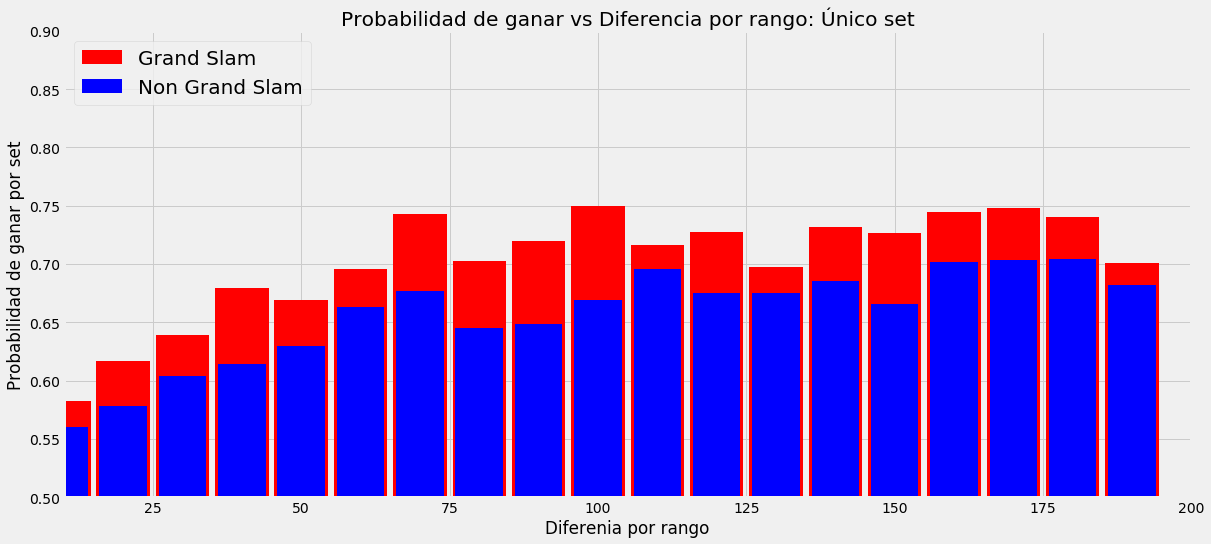

In [153]:
plt.bar(bins,prob_gs,  width = 9, color = 'red',)
plt.bar(bins,prob_non_gs,  width = 8, color = 'blue')
plt.title('Probabilidad de ganar vs Diferencia por rango: Único set')
plt.legend(['Grand Slam', 'Non Grand Slam'], loc = 2, fontsize = 20)
plt.xlabel('Diferenia por rango')
plt.ylabel('Probabilidad de ganar por set')
plt.ylim([0.5,0.9])
plt.xlim([10,200])
plt.show()

En este gráfico hemos analizado la probabilidad de ganar un Grand Slam frente la diferencia de ranking entre los jugadores.
Podemos observar que conforme el ranking es menor la probabilidad de ganar un Grand Slam es muy baja, como es obvio. Pero si la probabilidad de ganar un set en un Grand Slam es mucho mayor cuando la posición se encuentra entre las mas altas, ya que implica un mayor nivel de jugadores y por tanto una mayor probabilidad de vencer.


## Análisis de victoria por partido

Como bien sabemos un partido de tenis de partido no Grand-Slam se gana al mejor de tres sets. Por tanto, vamos a analizar la probabilidad de que un jugador gane, en funcion del set que se gana y su diferencia de ranking.

Definimos la función que nos devuelva la probabilidad de ganar un set, en función de la diferencia de ranking, número de set y número de ronda

C:\Users\ricki\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

C:\Users\ricki\Anaconda3\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning:

axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.

C:\Users\ricki\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning:

axes.hold is deprecated, will be removed in 3.0



Text(0.5,1,'Non-Grand Slam Matches')

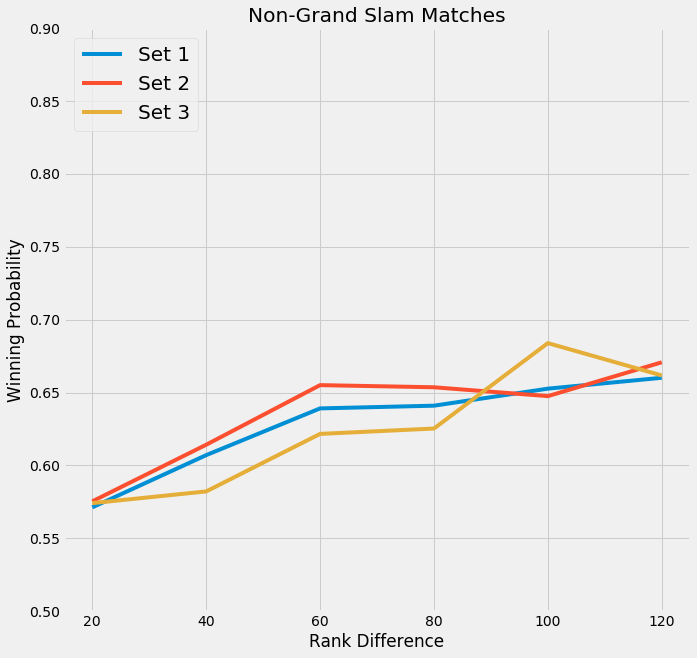

In [154]:
def Set_prob(pos_diff,set_num,df,round_factor): 
                                                
                                                
       
    diff_df = df[df[round_factor] == pos_diff]
    diff_df = diff_df[diff_df['Total Sets']>=set_num]
    feat1 = "W" + str(set_num)
    feat2 = "L" + str(set_num)
    set_df = diff_df[diff_df[feat1]>diff_df[feat2]]
    w1 = len(set_df)
    l1 = len(diff_df) - w1
            
    diff_df = df[df[round_factor] == -pos_diff]
    diff_df = diff_df[diff_df['Total Sets']>=set_num]
    feat1 = "W" + str(set_num)
    feat2 = "L" + str(set_num)
    set_df = diff_df[diff_df[feat1]>diff_df[feat2]]
    l2 = len(set_df)
    w2 = len(diff_df) - l2
            
    w = w1 + w2
    l = l1 + l2
            
    return np.true_divide(w,l+w)
   
                
bins = np.arange(20,140,20)
prob_1 = []
prob_2 = []
prob_3 = []


for rank_diff in bins:
    
    prob_1.append(Set_prob(rank_diff,1,df_non_GS,"Round_20"))
    prob_2.append(Set_prob(rank_diff,2,df_non_GS,"Round_20"))
    prob_3.append(Set_prob(rank_diff,3,df_non_GS,"Round_20"))
    
plt.figure(figsize = (10,10))
plt.hold(True)
plt.plot(bins,prob_1)
plt.plot(bins,prob_2)
plt.plot(bins,prob_3) 
plt.ylim([0.5,0.9])
plt.legend(['Set 1', 'Set 2', 'Set 3', 'Set 4','Set 5'], loc = 2, fontsize = 20)  
plt.xlabel('Rank Difference')
plt.ylabel('Winning Probability')
plt.title('Non-Grand Slam Matches')

Como vemos, a medida que la diferencia de ranking es menor, la probabilidad de vencer disminuye indistintamente del set que se gane. Conforme la diferencia del ranking es mayor, la probabilidad de ganar un determinado set incrementa la probabilidad de ganar el partido.

A continuación vamos a observar la probabilidad de ganar un partido Grand Slam en funcion de los 5 sets y la diferencia de ranking entre los jugadores.

C:\Users\ricki\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

C:\Users\ricki\Anaconda3\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning:

axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.

C:\Users\ricki\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning:

axes.hold is deprecated, will be removed in 3.0



Text(0.5,1,'Grand Slam Matches')

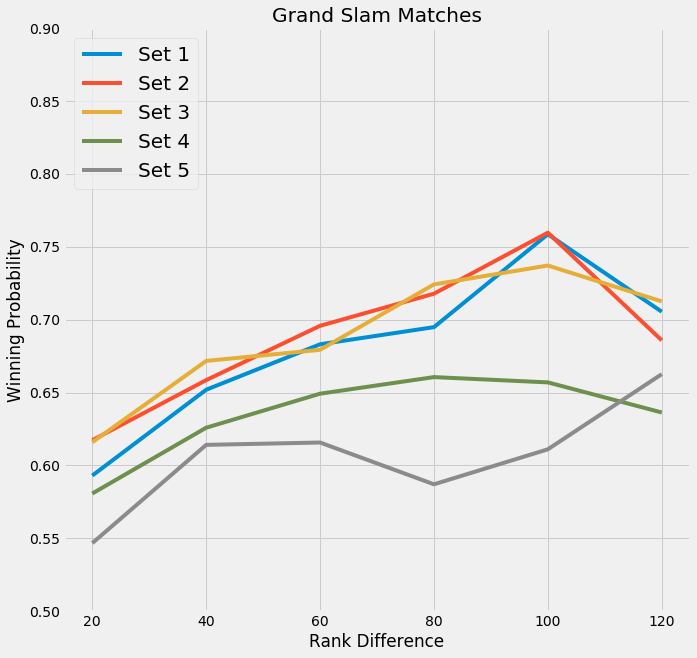

In [155]:
bins = np.arange(20,140,20)
prob_1 = []
prob_2 = []
prob_3 = []
prob_4 = []
prob_5 = []

for rank_diff in bins:
    
    prob_1.append(Set_prob(rank_diff,1,df_GS,"Round_20"))
    prob_2.append(Set_prob(rank_diff,2,df_GS,"Round_20"))
    prob_3.append(Set_prob(rank_diff,3,df_GS,"Round_20"))
    prob_4.append(Set_prob(rank_diff,4,df_GS,"Round_20"))
    prob_5.append(Set_prob(rank_diff,5,df_GS,"Round_20"))
    
plt.figure(figsize = (10,10))
plt.hold(True)
plt.plot(bins,prob_1)
plt.plot(bins,prob_2)
plt.plot(bins,prob_3) 
plt.plot(bins,prob_4)
plt.plot(bins,prob_5) 
plt.ylim([0.5,0.9])
plt.legend(['Set 1', 'Set 2', 'Set 3', 'Set 4','Set 5'], loc = 2, fontsize = 20)  
plt.xlabel('Rank Difference')
plt.ylabel('Winning Probability')
plt.title('Grand Slam Matches')

La probabilidad de ganar el partido cuando la diferencia es mayor y el primer set es ganado se encuentra por encima del 0,7%. 
Sin embargo el factor set influye bastante ya que no es lo mismo ganar el primer set que ganar el 5.
Cuando la diferencia entre ambos jugadores es menor a 40, la probabilidad de ganar el partido en funcion del set es menor ya que el factor ranking influye menos en la probabilidad de ganar.

## Análisis de la superficie de juego

A continuación vamos a representar en un gráfico tridimensional las diferentes superficies, las cuales son fundamentalmente tierra batida y césped, las cuales las representaremos junto con los mejores jugadores para determinar quéjugadores son los mejores en una y otra superficie.

In [156]:
winners = np.unique(new_df.Winner)
losers = np.unique(new_df.Loser)
players = np.append(winners,losers)
players_un = np.unique(players)
record = np.zeros(len(players_un)) 
GS_record = np.zeros(len(players_un)) 
Clay_record =  np.zeros(len(players_un)) 
Carpet_record = np.zeros(len(players_un))
Grass_record = np.zeros(len(players_un))
Hard_record = np.zeros(len(players_un))
fifth_set_record = np.zeros(len(players_un))
the_final_record = np.zeros(len(players_un))

d = {'Player_name': players_un, 'record':record, 'GS_record': GS_record,'Clay_record': Clay_record, 'Carpet_record': Carpet_record,'Grass_record':Grass_record,'Hard_record':Hard_record,'fifth_set_recrod':fifth_set_record,'the_final_record':the_final_record }
players_df = pd.DataFrame(data=d)

for i,row in enumerate(players_df.iterrows()):
    w = len(new_df[new_df.Winner == row[1].Player_name])
    l = len(new_df[new_df.Loser == row[1].Player_name])
    players_df.loc[i,'Total_Games'] = w + l
    players_df.loc[i,'record'] = np.true_divide(w,(w+l))
    
    temp_df = new_df[new_df.Series == 'Grand Slam']
    w = len(temp_df[temp_df.Winner == row[1].Player_name])
    l = len(temp_df[temp_df.Loser == row[1].Player_name])
    players_df.loc[i,'Total_GS_Games'] = w + l
    players_df.loc[i,'GS_record'] = np.true_divide(w,(w+l))
    
    temp_df = new_df[new_df.Surface == 'Clay']
    w = len(temp_df[temp_df.Winner == row[1].Player_name])
    l = len(temp_df[temp_df.Loser == row[1].Player_name])
    players_df.loc[i,'Total_Clay_Games'] = w + l
    players_df.loc[i,'Clay_record'] = np.true_divide(w,(w+l))
    
    temp_df = new_df[new_df.Surface == 'Carpet']
    w = len(temp_df[temp_df.Winner == row[1].Player_name])
    l = len(temp_df[temp_df.Loser == row[1].Player_name])
    players_df.loc[i,'Total_Carpet_Games'] = w + l
    players_df.loc[i,'Carpet_record'] = np.true_divide(w,(w+l))
    
    temp_df = new_df[new_df.Surface == 'Grass']
    w = len(temp_df[temp_df.Winner == row[1].Player_name])
    l = len(temp_df[temp_df.Loser == row[1].Player_name])
    players_df.loc[i,'Total_Grass_Games'] = w + l
    players_df.loc[i,'Grass_record'] = np.true_divide(w,(w+l))
    
    temp_df = new_df[new_df.Surface == 'Hard']
    w = len(temp_df[temp_df.Winner == row[1].Player_name])
    l = len(temp_df[temp_df.Loser == row[1].Player_name])
    players_df.loc[i,'Total_Hard_Games'] = w + l
    players_df.loc[i,'Hard_record'] = np.true_divide(w,(w+l))
    
    temp_df = new_df[new_df['Total Sets'] == 5]
    w = len(temp_df[temp_df.Winner == row[1].Player_name])
    l = len(temp_df[temp_df.Loser == row[1].Player_name])
    players_df.loc[i,'Total_fifth_set_recrod_Games'] = w + l
    players_df.loc[i,'fifth_set_recrod'] = np.true_divide(w,(w+l))
    
    temp_df = new_df[new_df['Round'] == 'The Final']
    w = len(temp_df[temp_df.Winner == row[1].Player_name])
    l = len(temp_df[temp_df.Loser == row[1].Player_name])
    players_df.loc[i,'Total_final_Games'] = w + l
    players_df.loc[i,'the_final_recrod'] = np.true_divide(w,(w+l))


players_df['GS_Factor'] = (players_df.GS_record - players_df.record)/(players_df.GS_record + players_df.record)
players_df['Final_Factor'] = (players_df.the_final_recrod - players_df.record)/(players_df.the_final_recrod + players_df.record)
serious_players_df = players_df[players_df.Total_GS_Games > 10]
serious_players_df = serious_players_df[serious_players_df.Total_final_Games>10]

C:\Users\ricki\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\ricki\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\ricki\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\ricki\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\ricki\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\ricki\Anaconda3\lib\site-packages\ipykernel_launcher.py:63: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\ricki\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning:

invalid value encountered in true_divide



Vamos a realizar un análisis cluster mediante el método de k-means para clasificar los jugadores en funcion de la superficie de juego. Este tipo de ilustración es en 3D por lo que usaremos tres tipos de variables y por tanto haremos tres tipos de clasificaciones. Hierba, tierra batida y pista dura.

In [157]:
from sklearn.cluster import KMeans
semi_serious_players_df = players_df[players_df.Total_Games>163]
data= {'Clay_record': semi_serious_players_df.Clay_record,'Grass_record' :semi_serious_players_df.Grass_record,'Hard_record':semi_serious_players_df.Hard_record} #'fifth_set_recrod':fifth_set_record,'the_final_record':the_final_record }
kmeans_df =  pd.DataFrame(data=data)

kmeans = KMeans(n_clusters = 3, random_state = 0).fit(kmeans_df)
semi_serious_players_df['label'] = kmeans.labels_

C:\Users\ricki\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



C:\Users\ricki\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

C:\Users\ricki\Anaconda3\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning:

axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.

C:\Users\ricki\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning:

axes.hold is deprecated, will be removed in 3.0



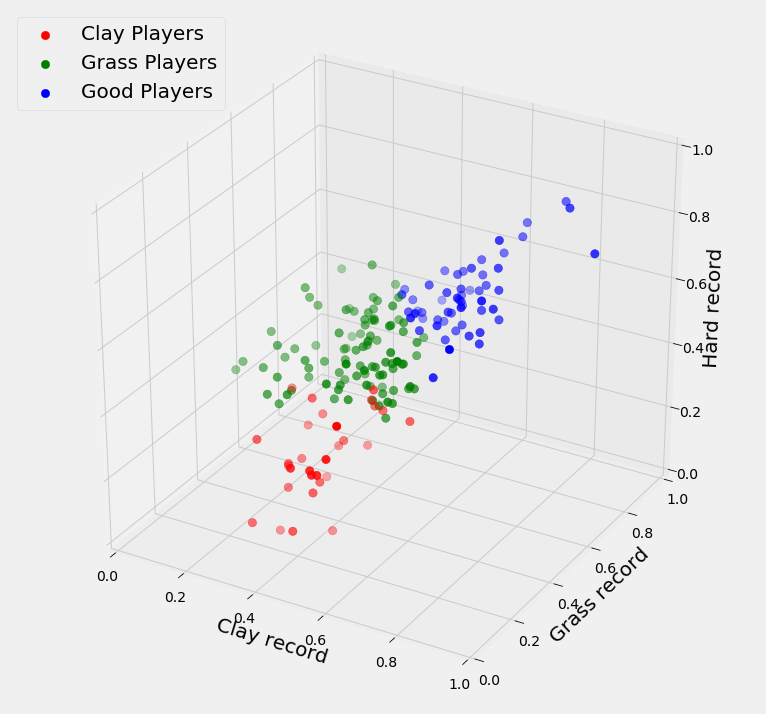

In [158]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
x1 = np.array(semi_serious_players_df.Clay_record[semi_serious_players_df.label == 0])
y1 = np.array(semi_serious_players_df.Grass_record[semi_serious_players_df.label == 0])
z1 = np.array(semi_serious_players_df.Hard_record[semi_serious_players_df.label == 0])

x2 = np.array(semi_serious_players_df.Clay_record[semi_serious_players_df.label == 1])
y2 = np.array(semi_serious_players_df.Grass_record[semi_serious_players_df.label == 1])
z2 = np.array(semi_serious_players_df.Hard_record[semi_serious_players_df.label == 1])

x3 = np.array(semi_serious_players_df.Clay_record[semi_serious_players_df.label == 2])
y3 = np.array(semi_serious_players_df.Grass_record[semi_serious_players_df.label == 2])
z3 = np.array(semi_serious_players_df.Hard_record[semi_serious_players_df.label == 2])

plt.hold(True)
ax.scatter(x1,y1, zs = z1, zdir='z', s=70, c= 'r',depthshade=True)
ax.scatter(x2,y2, zs = z2, zdir='z', s=70, c= 'g',depthshade=True)
ax.scatter(x3,y3, zs = z3, zdir='z', s=70, c= 'b',depthshade=True)
ax.set_xlabel('Clay record', fontsize = 20)
ax.set_ylabel('Grass record', fontsize = 20)
ax.set_zlabel('Hard record', fontsize = 20)
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_zlim([0,1])

plt.legend(['Clay Players', 'Grass Players', 'Good Players'], loc = 2, fontsize = 20)

Observando el gráfico en 3D. Vemos las tres clasificaciones se encuentra mas o menos distribuidas con una amyor proporcion de puntos verdes que se refieren a la suoerficie de hierba. Existen algunos puntos rojos y azules cercanos a la proporcion de puntos verde. En definitiva, hay mayor constancia en la superficie de pista dura frente a la superficie de tierra batida.

Sin embargo vamos a observar el mismo gráfico en 2D para hacer una mayor diferenciación y visualización entre ellas.

C:\Users\ricki\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

C:\Users\ricki\Anaconda3\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning:

axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.

C:\Users\ricki\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning:

axes.hold is deprecated, will be removed in 3.0

C:\Users\ricki\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

C:\Users\ricki\Anaconda3\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning:

axes.ho

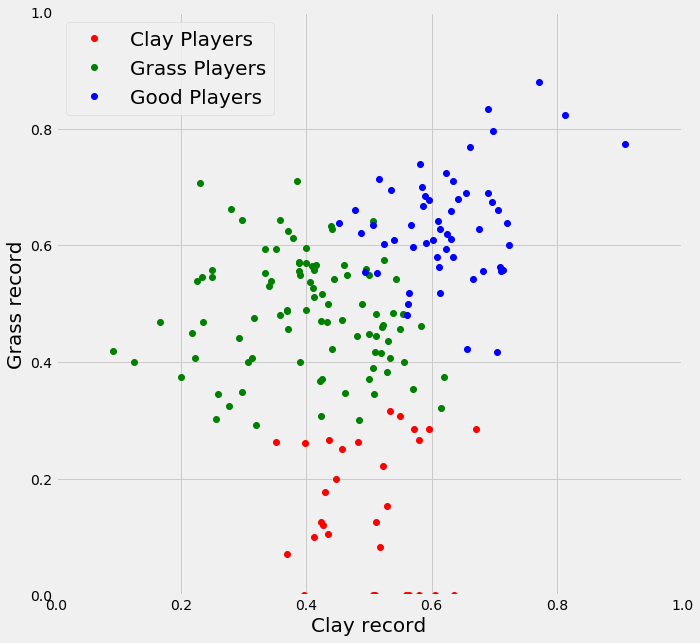

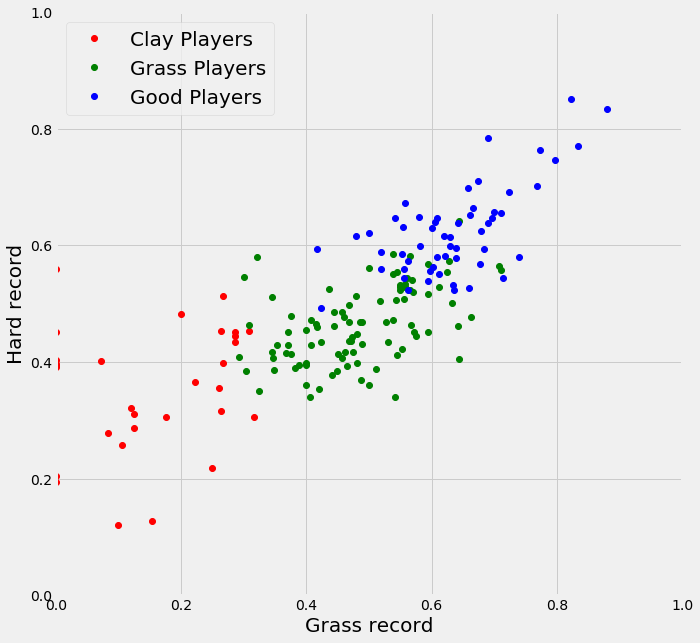

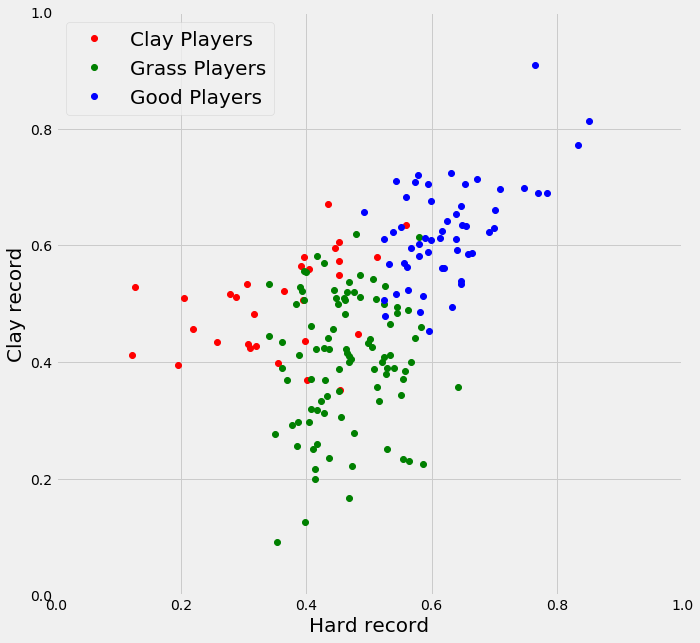

In [159]:
plt.figure(figsize=(10,10))
plt.hold(True)
plt.plot(x1,y1,'ro')
plt.plot(x2,y2,'go')
plt.plot(x3,y3,'bo')
plt.xlabel('Clay record',fontsize = 20)
plt.ylabel('Grass record',fontsize = 20)
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(['Clay Players', 'Grass Players', 'Good Players'], loc = 2, fontsize = 20)

plt.figure(figsize=(10,10))
plt.hold(True)
plt.plot(y1,z1,'ro')
plt.plot(y2,z2,'go')
plt.plot(y3,z3,'bo')
plt.xlabel('Grass record', fontsize = 20)
plt.ylabel('Hard record',fontsize = 20)
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(['Clay Players', 'Grass Players', 'Good Players'], loc = 2, fontsize = 20)

plt.figure(figsize=(10,10))
plt.hold(True)
plt.plot(z1,x1,'ro')
plt.plot(z2,x2,'go')
plt.plot(z3,x3,'bo')
plt.xlabel('Hard record',fontsize = 20)
plt.ylabel('Clay record',fontsize = 20)
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(['Clay Players', 'Grass Players', 'Good Players'], loc = 2, fontsize = 20)

## Análisis de victoria por jugadores

A continuación, elegimos a Djokovic, Nadal y Federer que son tres jugadores que se en encuentran normalmente en posiciones altas de tabla. Analizaremos su probabilidad de ganar en función de la superficie en la que juegan.

C:\Users\ricki\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning:

pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.

C:\Users\ricki\Anaconda3\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning:

axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.

C:\Users\ricki\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning:

axes.hold is deprecated, will be removed in 3.0



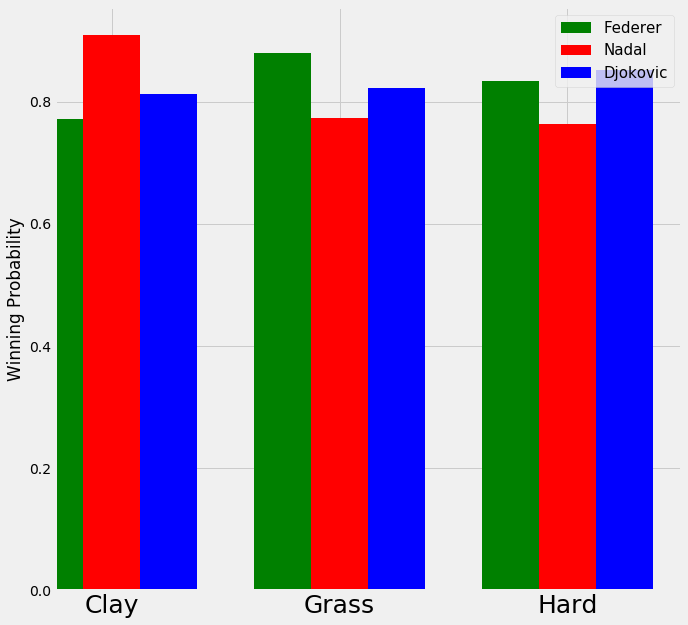

In [160]:
federer = np.zeros(3)
federer[0] = semi_serious_players_df.Clay_record[semi_serious_players_df.Player_name == 'Federer R.']
federer[1] = semi_serious_players_df.Grass_record[semi_serious_players_df.Player_name == 'Federer R.']
federer[2] = semi_serious_players_df.Hard_record[semi_serious_players_df.Player_name == 'Federer R.']

nadal = np.zeros(3)
nadal[0] = semi_serious_players_df.Clay_record[semi_serious_players_df.Player_name == 'Nadal R.']
nadal[1] = semi_serious_players_df.Grass_record[semi_serious_players_df.Player_name == 'Nadal R.']
nadal[2] = semi_serious_players_df.Hard_record[semi_serious_players_df.Player_name == 'Nadal R.']

djokovich = np.zeros(3)
djokovich[0] = semi_serious_players_df.Clay_record[semi_serious_players_df.Player_name == 'Djokovic N.']
djokovich[1] = semi_serious_players_df.Grass_record[semi_serious_players_df.Player_name == 'Djokovic N.']
djokovich[2] = semi_serious_players_df.Hard_record[semi_serious_players_df.Player_name == 'Djokovic N.']

plt.figure(figsize = (10,10))
plt.hold(True)
plt.bar([0,2,4],federer, color = 'green' , width = 0.5)
plt.bar([0.5,2.5,4.5],nadal, color = 'red', width = 0.5)
plt.bar([1,3,5],djokovich, color = 'blue', width = 0.5)
plt.xlim(0,5.5)
plt.xticks([0.5,2.5,4.5], ['Clay','Grass','Hard'], fontsize = 25)
plt.legend(['Federer','Nadal','Djokovic'], fontsize = 15)
plt.ylabel('Winning Probability')
plt.show()

Por lo general, Nadal juega mejor en tierra batida por tanto tiene una mayor probabilidad de ganar seguido de pista dura y hierba.
Federer, suele jugar mejor en hierba seguido de pista dura y tierra batida. Sin embargo Federer es un jugador mas estable ya que su porcenatje entre las tres superficies es casi el mismo,
Djokovic, tiene la misma probabilidad de victoria en hierba y pista dura y mas o menos baja en tierra batida.


## Predicción rendimiento Nadal para 2017

En primer lugar, elegimos solo las variables que utilizaremos para predecir su rendimiento. Cogeremos los sets ganados y perdidos por este jugador que son las variables que nos pueden aportar mayor información. Además cogeremos la variable fecha y ganador.

In [161]:
datosprediccion = pd.DataFrame(tennis_df, columns=['Date', 'Wsets','Winner','Lsets'])

In [162]:
datosprediccion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46652 entries, 0 to 46651
Data columns (total 4 columns):
Date      46652 non-null object
Wsets     46462 non-null float64
Winner    46652 non-null object
Lsets     46462 non-null float64
dtypes: float64(2), object(2)
memory usage: 1.4+ MB


Filtramos por Nadal R que es el jugador con el que vamos a realizar nuestro análisis.

In [163]:
datosprediccion1 = datosprediccion[datosprediccion.Winner == 'Nadal R.']

In [164]:
datosprediccion1.head()

,Date,Wsets,Winner,Lsets
9680,15/04/2003,2.0,Nadal R.,0.0
9694,16/04/2003,2.0,Nadal R.,0.0
9738,22/04/2003,1.0,Nadal R.,0.0
9936,12/05/2003,2.0,Nadal R.,0.0
9965,14/05/2003,2.0,Nadal R.,0.0


In [165]:
datosprediccion1['Date'] = pd.to_datetime(datosprediccion1.Date)

C:\Users\ricki\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [166]:
datosprediccion1.index = datosprediccion1["Date"]

Quitamos las variables Fecha y Ganador ya que solo haremos la prediccion con los sets ganados y perdidos.

In [167]:
datosprediccion1.drop('Date', axis=1, inplace=True)
datosprediccion1.drop('Winner', axis=1, inplace=True)
datosprediccion1.head()

C:\Users\ricki\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,Wsets,Lsets
Date,,
2003-04-15,2.0,0.0
2003-04-16,2.0,0.0
2003-04-22,1.0,0.0
2003-12-05,2.0,0.0
2003-05-14,2.0,0.0


Filtramos la fecha por trimestre para que nos resulte mas facil la visualizacion

In [168]:
datos_time_series = datosprediccion1.resample("Q").sum()

In [169]:
datos_time_series.head(10)

,Wsets,Lsets
Date,,
2003-06-30,13.0,1.0
2003-09-30,14.0,1.0
2003-12-31,2.0,0.0
2004-03-31,25.0,3.0
2004-06-30,6.0,2.0
2004-09-30,14.0,0.0
2004-12-31,8.0,1.0
2005-03-31,47.0,7.0
2005-06-30,56.0,5.0


In [170]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

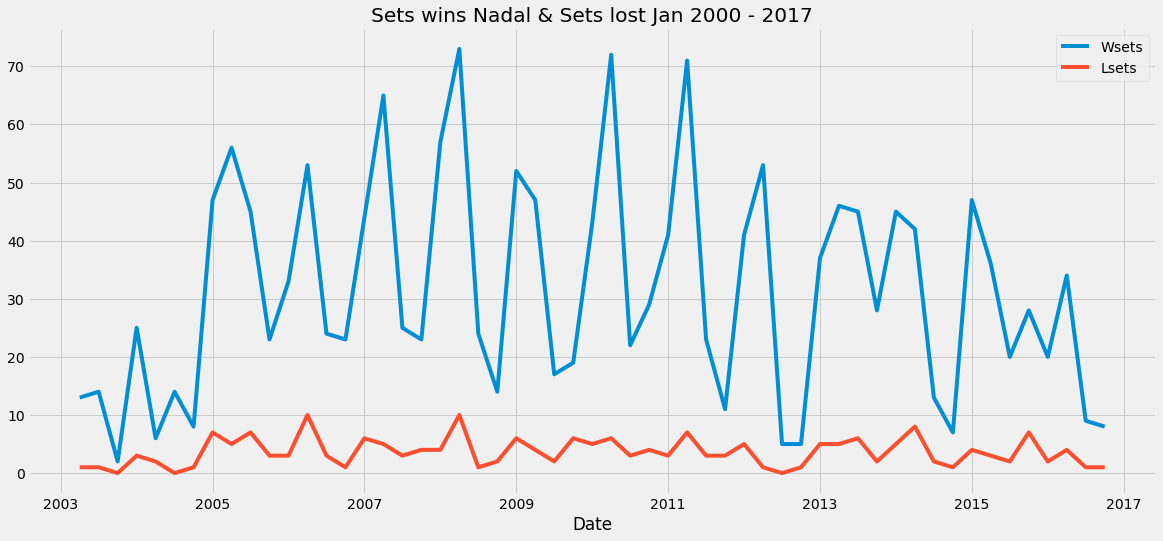

In [171]:
import plotly.plotly as ply
#import cufflinks as cf
datos_time_series.plot(title="Sets wins Nadal & Sets lost Jan 2000 - 2017")

En este gráfico podemos observar uan comparación de los sets ganados y perdidos por Nadal desde el año 2003, cuand inició a competir como profesional hasta 2017 

Podemos ver que al principio Nadal no ganaba muchos sets, debido a que estaba empezando a competir en la ATP, en el 2005 podemos ver un cambio considerable en ,a cantidad de sets ganados, para seguir aumenando hasta 2009 que es su mejor momento

En 2005 este jugador, consigue ganar su primer Grand Slam, Roland Garros, por lo que a partir de este momento empieza su camino hacia el éxito.

In [172]:
datos_time_series.fillna(0, inplace=True)
datos_time_series.head()

,Wsets,Lsets
Date,,
2003-06-30,13.0,1.0
2003-09-30,14.0,1.0
2003-12-31,2.0,0.0
2004-03-31,25.0,3.0
2004-06-30,6.0,2.0


In [173]:
from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from matplotlib import pyplot
type(datos_time_series)

pandas.core.frame.DataFrame

In [174]:
datos_time_series.isnull().any()

Wsets    False
Lsets    False
dtype: bool

In [175]:
datos_time_series.shape

(55, 2)

In [176]:

s=sm.tsa.seasonal_decompose(datos_time_series)

Observamos la tendencia, el componente estacional y los residuos de las dos variables

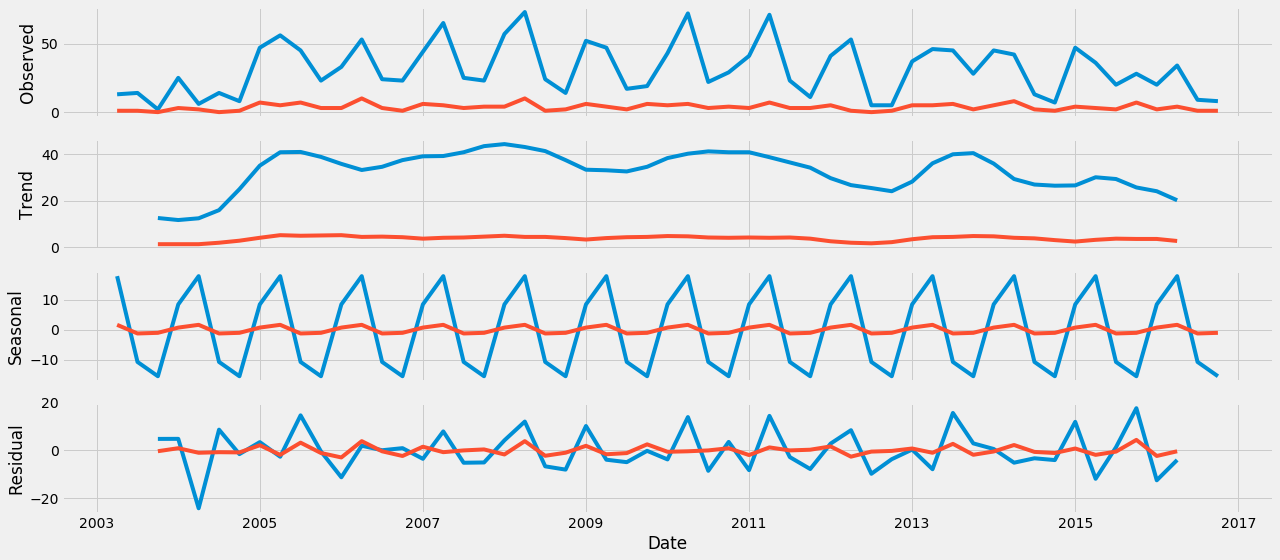

In [177]:
s.plot()
pyplot.show()

Probamos una combinacion de modelos ARIMA, para ver cual de ellos se ajusta mejor a nuestra prediccion

In [178]:
#Vamos a probar una combinacion de modelos arima a ver cual se ajusta mejor
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


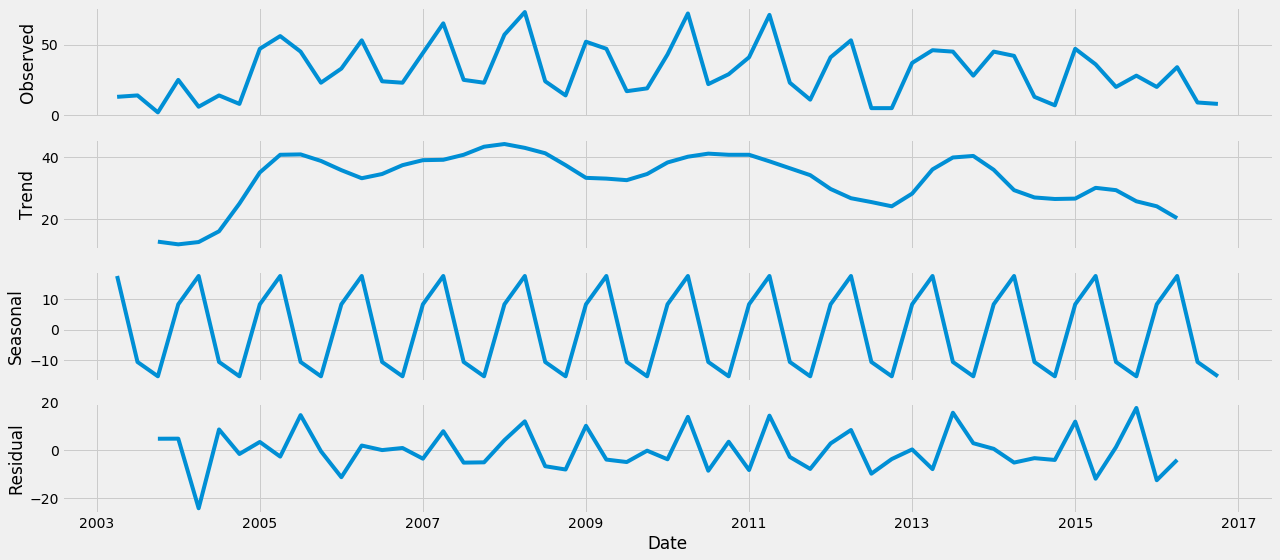

In [179]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(datos_time_series.Wsets, model='additive')
fig = decomposition.plot()
plt.show()

En nuestro caso, escogeremos el modelo (1,1,1), que es el que mejor se adapta.

In [180]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(datos_time_series.Wsets,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0703      0.282      0.250      0.803      -0.482       0.622
ma.L1         -0.9191      0.223     -4.115      0.000      -1.357      -0.481
ar.S.L12      -0.1665      0.179     -0.928      0.354      -0.518       0.185
sigma2       194.5782     66.969      2.905      0.004      63.320     325.836


In [181]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(datos_time_series.Wsets,
                                        order=param,
                                        seasonal_order=param_seasonal,
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)
results = mod.fit()
print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:230.83156858752753


In [182]:
mod = sm.tsa.statespace.SARIMAX(datos_time_series.Wsets,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0703      0.282      0.250      0.803      -0.482       0.622
ma.L1         -0.9191      0.223     -4.115      0.000      -1.357      -0.481
ar.S.L12      -0.1665      0.179     -0.928      0.354      -0.518       0.185
sigma2       194.5782     66.969      2.905      0.004      63.320     325.836


Vemos que los residudos siguen una distribucion normal y que el correlograma se encuentra dentro del intervalo de confianza, por lo que tendría sentido hacer una prediccion.

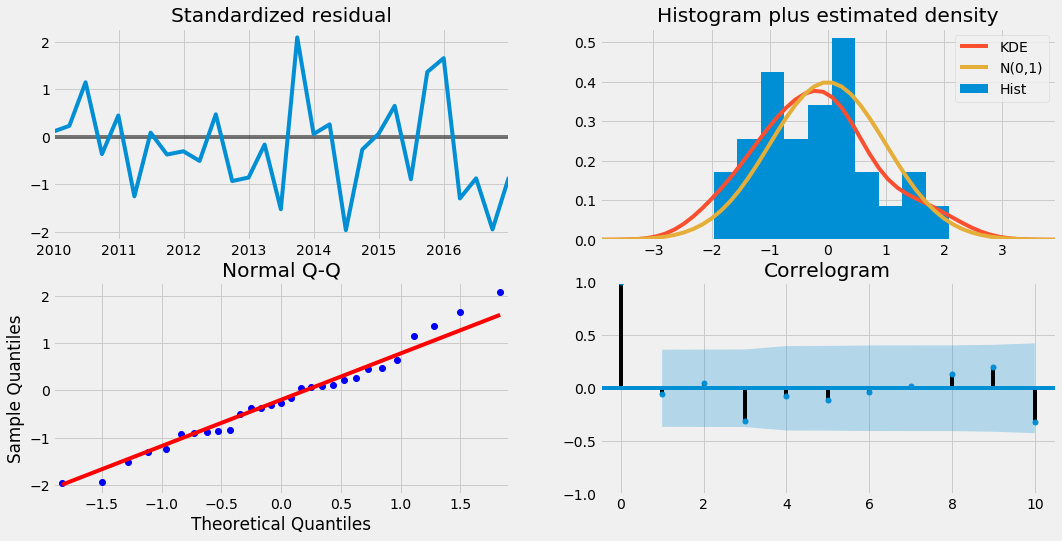

In [183]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

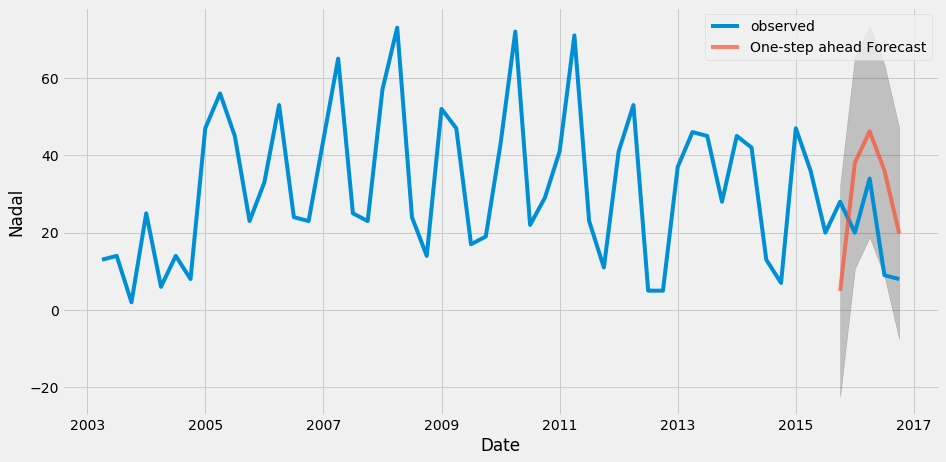

In [184]:
pred = results.get_prediction(start=pd.to_datetime('2015-12-31'), dynamic=False)
pred_ci = pred.conf_int()
ax = datos_time_series.Wsets['2003-06-30':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Nadal')
plt.legend()
plt.show()

observamos que entre 2008 y 2010 son los años donde Nadal se establecerá como uno de lso mejores jugadores del mundo y su rendiemitno es el mas alto de su carrera.
A partir de 2012, Rafael Nadal experimenta una serie de molestias y lesiones que le hacen bajar su nivel. Esto se ve reflejado en su rendimeinto posterior, ya debido a los años y que el fisico va mermando. En 2015, vemos el número de victorias va bajando en relacion al resto de años y que su rendimiento por ende también.

Los datos observados se corresponde con nuestra predicción realizada, ya que ambas se encuentran dentro del intervalo

In [185]:
model = ARIMA(datos_time_series.Wsets, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Wsets   No. Observations:                   54
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -235.788
Method:                       css-mle   S.D. of innovations             18.787
Date:                Sun, 10 Feb 2019   AIC                            479.575
Time:                        11:54:14   BIC                            487.531
Sample:                    09-30-2003   HQIC                           482.644
                         - 12-31-2016                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0142      0.334      0.043      0.966      -0.641       0.669
ar.L1.D.Wsets     0.1859      0.190      0.979      0.332      -0.186       0.558
ma.L1.D.Wsets    -0.9212      0.156     

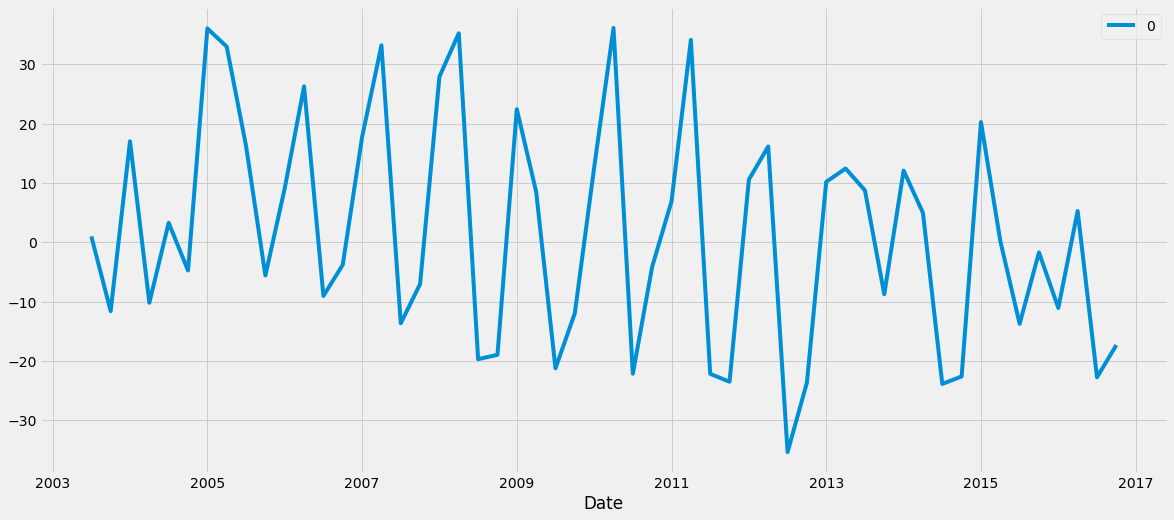

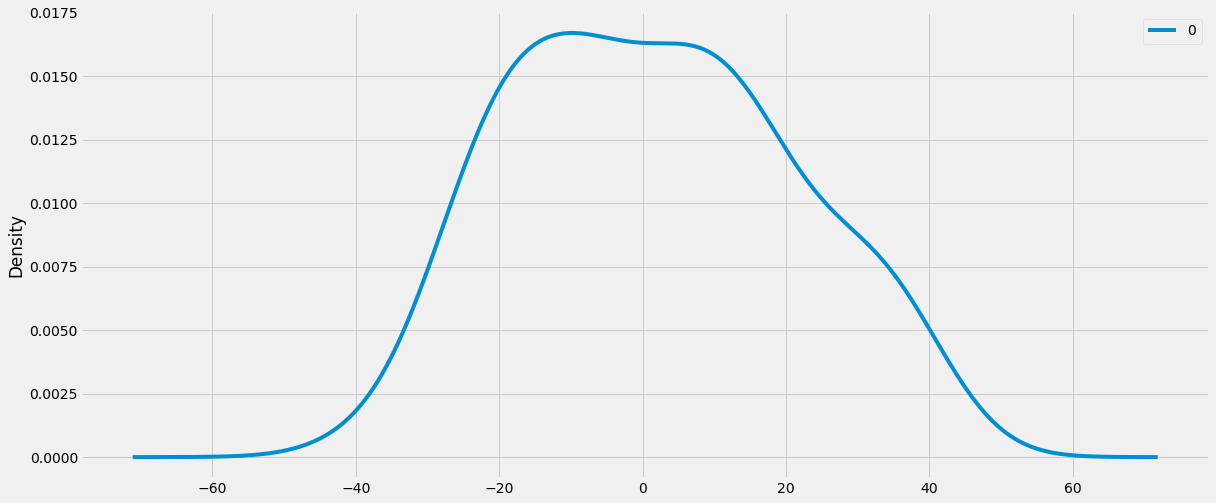

               0
count  54.000000
mean    1.608329
std    19.041180
min   -35.379160
25%   -13.237334
50%     0.601343
75%    15.257655
max    36.125383


In [186]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

## Conclusiones

- En primer lugar, hemos realizado un análisis de los datos para más adelante, observar la probabilidad de ganar un partido en funcion de los sets ganados, la diferencia de ranking entre los jugadores, de la superficie en la que se juega y finalmente comparando tres jugadores. 

- En segundo lugar, hemos realizado una predicción del rendimiento de Nadal en función de los sets ganados y perdidos para el año 2017. 

- El modelo indica que el rendimiento de Nadal bajará, debido a un periodo de lesiones y molestias que el jugador balear experimenta durante el 2017. Esta bajada de rendimiento se ve reflejada en la cantidad de sets ganados. Por lo que hicimos nuestra predicicon para ese año y vemos que se encuentra dentro del intervalo de lo observado. Por lo que podemos decir que nuestro modelo predictivo acierta con el rendimiento del jugador.

- Este enfoque puede ser útil para establecer las cuotas de los diferentes jugadores en las casas de apuestas en funcion de la trayectoria que vayan a tener. 

Nuestra práctica final de Machine Learning nos ha servido fundamentalmente para realizar un análisis exhaustivo en la exploración de los datos y por otra parte, a través de un modelo ARIMA realizar una predicción de la evolución que experimentará Rafael Nadal para los años posteriores.

## Bibliografía

A continuación señalamos todas la páginas que nos han servido a la hora de realizar esta práctica final, siendo en su mayor parte Kernels subidos a través de Kaggle, así como repositorios GitHub, son los siguientes:

https://www.kaggle.com/ambarish/omnibus-womens-and-mens-tennis-matches-analysis

https://www.kaggleusercontent.com/kf/2785659/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..cwISGFlpfjGRX4kg9ctHyw.YMuWQm-dtrStT5MazGjVRMI2D9mQapwdqzATNLNWVogIRsY3RcJsUtTIC-oogOd2q6E--mEcCRco1zEJexSwLTre-KALEQ5GDDEBnoRhwOZ24bpyc8tX5EexmaL70LW_j42krve6HPbSqLK7_PPAVgoQOSqNSuBUAczDy5xWXEagZEARfNBGR8cNishMmPOT.qQsCAV5feqjjXRpbFHRs0g/__results__.html

https://www.kaggle.com/jordangoblet/atp-tour-20002016

https://www.kaggle.com/nescobar/data-visualizations-of-atp-tennis-competitions

https://www.kaggle.com/ryanthomasallen/tennis-match-charting-project

https://www.kaggle.com/grahamcleven/tennisdata-py

https://towardsdatascience.com/simulating-tennis-matches-with-python-or-moneyball-for-tennis-a3359df0d072

https://github.com/themetalfleece/tennis-score